In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/Ganesh Baskar/OneDrive/Documents/Data/processed_employee_data.csv")
df.head()

,Age,DailyRate,DistanceFromHome,Education,TrainingTimesLastYear,EnvironmentSatisfaction,HourlyRate,JobInvolvement,YearsWithCurrManager,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,JobSatisfaction,PerformanceRating,Attrition
0,0.446350,0.742527,-1.010909,-0.891688,-2.171982,-0.660531,1.383138,0.379672,0.245834,-0.108350,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.155707,0.254625,-0.240677,-1.026167,0.806541,-0.291719,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0
2,0.008343,1.414363,-0.887515,-0.891688,0.155707,1.169781,1.284725,-1.026167,-1.155935,-0.937654,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1
3,-0.429664,1.461466,-0.764121,1.061787,0.155707,1.169781,-0.486709,0.379672,-1.155935,-0.763634,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0
4,-1.086676,-0.524295,-0.887515,-1.868426,0.155707,-1.575686,-1.274014,0.379672,-0.595227,-0.644858,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [6]:
# Separate features (X) and target variable (y)
x = df.drop("Attrition", axis=1)   # Feature matrix
y = df["Attrition"]                # Target vector: Attrition status

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [8]:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek to handle class imbalance in the training data
smt = SMOTETomek(random_state=42)
x_train_resampled, y_train_resampled = smt.fit_resample(x_train, y_train)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,roc_auc_score,precision_score,recall_score,f1_score

# logistic regression

In [10]:
# Initialize logistic regression with class balancing to handle imbalanced data
model = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model on the resampled training data
model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(x_test)[:, 1]

# Display classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87       255
           1       0.34      0.67      0.45        39

    accuracy                           0.79       294
   macro avg       0.64      0.74      0.66       294
weighted avg       0.86      0.79      0.81       294

ROC-AUC Score: 0.7840120663650076


# Decision Tree classifier 

In [11]:
# Initialize a Decision Tree classifier with custom depth and class weighting
model_d = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight={0: 1, 1: 2},
    random_state=42
)

# Train the model on resampled (balanced) training data
model_d.fit(x_train_resampled, y_train_resampled)

# Predict labels and probabilities on the test set
y_pred = model_d.predict(x_test)
y_prob = model_d.predict_proba(x_test)[:, 1]  # Probability estimates for positive class

# Evaluate the model’s performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       255
           1       0.25      0.36      0.29        39

    accuracy                           0.77       294
   macro avg       0.57      0.60      0.58       294
weighted avg       0.81      0.77      0.79       294

ROC-AUC Score: 0.6471593765711413


# Random Forest Classifier

In [14]:
# Initialize a Random Forest classifier with class weights to handle imbalance
model_r = RandomForestClassifier(
    random_state=42,
    class_weight={0: 1, 1: 2}
)

# Train the model on resampled training data
model_r.fit(x_train_resampled, y_train_resampled)

# Evaluate model performance on the training set (optional check for overfitting)
train_score = model_r.score(x_train_resampled, y_train_resampled)
print(f"Training Accuracy: {train_score:.4f}")

# Predict labels on the test set
y_pred = model_r.predict(x_test)

# Extract and sort feature importances
feature_importances = pd.DataFrame({
    "Feature": x.columns,
    "Importance": model_r.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the top 10 most important features
print("\nTop 10 Feature Importances:")
print(feature_importances.head(10))

# Evaluate classification performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Training Accuracy: 1.0000

Top 10 Feature Importances:
                 Feature  Importance
35          OverTime_Yes    0.089061
34           OverTime_No    0.086650
14      StockOptionLevel    0.076922
8   YearsWithCurrManager    0.062317
9          MonthlyIncome    0.054247
0                    Age    0.043558
36       JobSatisfaction    0.039603
6             HourlyRate    0.033567
1              DailyRate    0.032707
2       DistanceFromHome    0.029897

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.67      0.21      0.31        39

    accuracy                           0.88       294
   macro avg       0.78      0.59      0.62       294
weighted avg       0.86      0.88      0.85       294

ROC-AUC Score: 0.5947209653092006


# Extreme Gradient Boosting

In [15]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, f1_score
import numpy as np

# Calculate scale_pos_weight to balance class distribution
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / (1.5 * len(y_train_resampled[y_train_resampled == 1]))

# Initialize XGBoost classifier with tuned hyperparameters
model_xgb = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_estimators=700,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    min_child_weight=3,
    eval_metric="logloss"
)

# Fit the model on balanced training data
model_xgb.fit(x_train_resampled, y_train_resampled)

# Predict probability scores on test data
y_prob = model_xgb.predict_proba(x_test)[:, 1]

# Precision-recall analysis for threshold tuning
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
precisions, recalls = precisions[:-1], recalls[:-1]  # Align lengths with thresholds

# Calculate F1 scores at each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

# Find threshold yielding highest F1 score
best_f1 = 0
best_threshold = 0
for t in np.linspace(0.05, 0.3, 100):
    y_pred_temp = (y_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# Final predictions using optimal threshold
y_pred_adjusted = (y_prob >= best_threshold).astype(int)

# Report performance metrics
print("Balanced Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print("Balanced ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Optimal Classification Threshold:", best_threshold)

Balanced Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       255
           1       0.47      0.49      0.48        39

    accuracy                           0.86       294
   macro avg       0.70      0.70      0.70       294
weighted avg       0.86      0.86      0.86       294

Balanced ROC-AUC Score: 0.7847159376571141
Optimal Classification Threshold: 0.2545454545454546


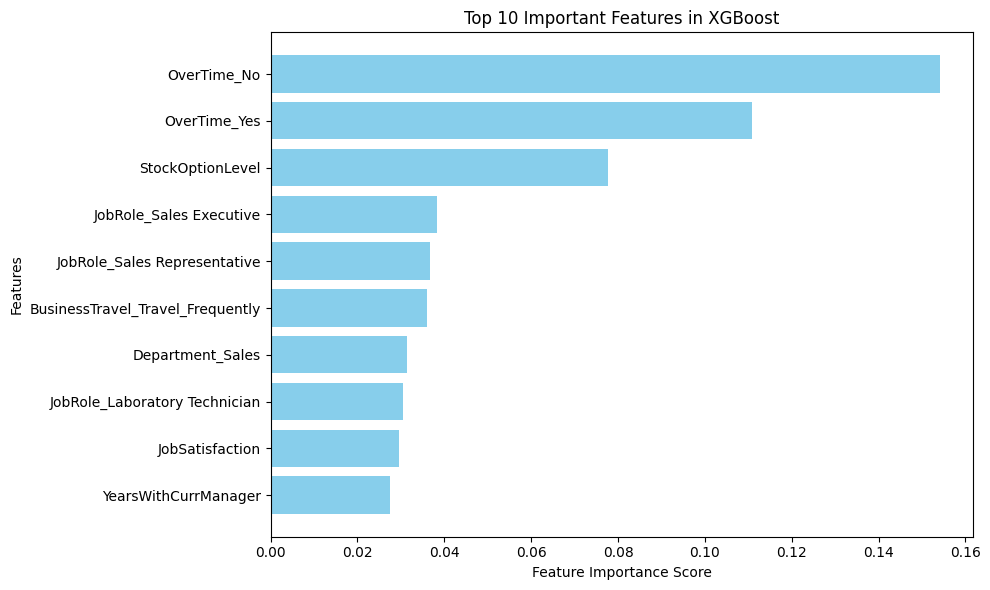

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Extract and sort feature importances
feature_importance = model_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
top_features = np.array(x_train.columns)[sorted_idx[:10]]
top_importances = feature_importance[sorted_idx[:10]]

# Plot top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in XGBoost")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()


In [17]:
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, f1_score
import numpy as np

# Initialize LightGBM classifier with class weighting to handle imbalance
best_model = lgb.LGBMClassifier(
    random_state=42,
    n_estimators=500,
    learning_rate=0.2,
    max_depth=5,
    class_weight='balanced'  # Automatically balances classes
)

# Train the model on resampled training data
best_model.fit(x_train_resampled, y_train_resampled)

# Predict probabilities on test set
y_prob = best_model.predict_proba(x_test)[:, 1]

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Adjust arrays to match threshold length
precisions, recalls = precisions[:-1], recalls[:-1]

# Calculate F1 scores across thresholds
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

# Find the best threshold that maximizes F1 score
best_f1 = 0
best_threshold = 0
for t in np.linspace(0.05, 0.3, 100):
    y_pred_temp = (y_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# Final prediction using optimal threshold
y_pred_adjusted = (y_prob >= best_threshold).astype(int)

# Compute and print metrics
roc_auc = roc_auc_score(y_test, y_prob)
print("Balanced Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print("Balanced ROC-AUC Score:", roc_auc)
print("Balanced Threshold Found:", best_threshold)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 977, number of negative: 977
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6149
[LightGBM] [Info] Number of data points in the train set: 1954, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [18]:
import pickle

with open("best_lgb_model.pkl", "wb") as file:
    pickle.dump(best_model, file)